<a href="https://colab.research.google.com/github/Kp-hash/pytorch/blob/main/MNist_Pytorch_sequential.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
# Import the required packages
import torch
from torch import nn
# This is the module for download sign
from tqdm.auto import tqdm
# contains modular datasets and architectures
from torchvision import transforms
from torchvision.datasets import MNIST
from torchvision.utils import make_grid
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torch.optim as optim
torch.manual_seed(0)

In [2]:
# We need to find a way to display our sample image
# Create a function to display images

def image_display(image_tensor, num_images= 30, size=(1,28,28)):
    '''
       This is a function we created to display and plot images on a grid.
       Parameters:
           Image_tensor: The tensor for our image.
           num_images: This is the number of images to display.
           size: This is the size of a single image
    '''
    # Take a tensor and flatten the tensor. chain functions
    image_unflat = image_tensor.detach().cpu().view(-1,*size)
    # Create image grid
    image_grid = make_grid(image_unflat[:num_images],nrow=6)
    plt.imshow(image_grid.permute(1,2,0).squeeze())
    plt.show()


In [3]:
# Load the MNIST dataset and transform to Tensors
trainset = MNIST('.', download=True, train=True, transform=transforms.ToTensor())
testset = MNIST('.', download=True, train = False, transform=transforms.ToTensor())
# Convert trnsors to dataloader
train_downloader = DataLoader(trainset,batch_size=32,shuffle=True,num_workers=4)
test_downloader = DataLoader(testset,batch_size=100,shuffle=False,num_workers=4)


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw




Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw




Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw




Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid poten

In [4]:
# View the shape of the dataloader
test_downloader.dataset.train_data.shape

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:64: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


torch.Size([10000, 28, 28])

In [5]:
# View the shape of the dataloader
train_downloader.dataset.train_data.shape

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:64: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


torch.Size([60000, 28, 28])

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:64: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


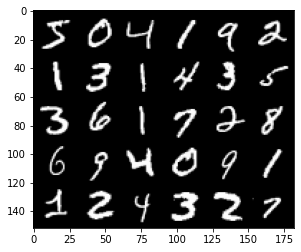

In [6]:
image_display(train_downloader.dataset.train_data)

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:64: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


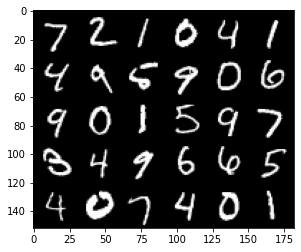

In [7]:
image_display(test_downloader.dataset.train_data)

In [243]:
# Define the single structure of a neuron
def single_neuron(input_dim,output_dim):
    return nn.Sequential(
        nn.Linear(input_dim,output_dim),
        nn.ReLU(inplace=True)
    )

In [248]:
# Create a class with the neuron
class full_network(nn.Module):
    def __init__(self,im_dim,hidden_dim):
        super(full_network,self).__init__()
        self.go = nn.Sequential(
            first_block(im_dim,hidden_dim), 
            first_block(hidden_dim,hidden_dim * 2),
            nn.Linear(hidden_dim * 2,10)
        )

    def forward(self,x):
        return self.go(x)

In [249]:
# Implement the model
model = full_network(784,500)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=3e-4)
for epoch in range(10):
    for image, data in enumerate(train_downloader):
        # Get the inputs
        inputs, labels = data
        inputs = inputs.view(-1,28*28)

        # zero the parameter gradients
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [250]:
# using model for prediction
correct,total = 0,0
predictions = []
model.eval()
# Get the test input image and the data
for image, data in enumerate(test_downloader):
    # assign inputs and the labels
    inputs, labels = data
    # Convert the input to the preferred shape
    inputs = inputs.view(-1,28 * 28)
    # Implement the trained model on the test data
    outputs = model(inputs)
    
    # assign predicted and the value for each of the predicted
    _, predicted = torch.max(outputs.data,1)
    # Append the outputs to the predictions list
    predictions.append(outputs)
    # Get the total number of labels used
    total += labels.size(0)
    # get the total number of correctly predicted
    correct += (predicted == labels).sum().item()
print('Test accurracy of network is : %d %%' % (100 * correct/total))

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Test accurracy of network is : 98 %


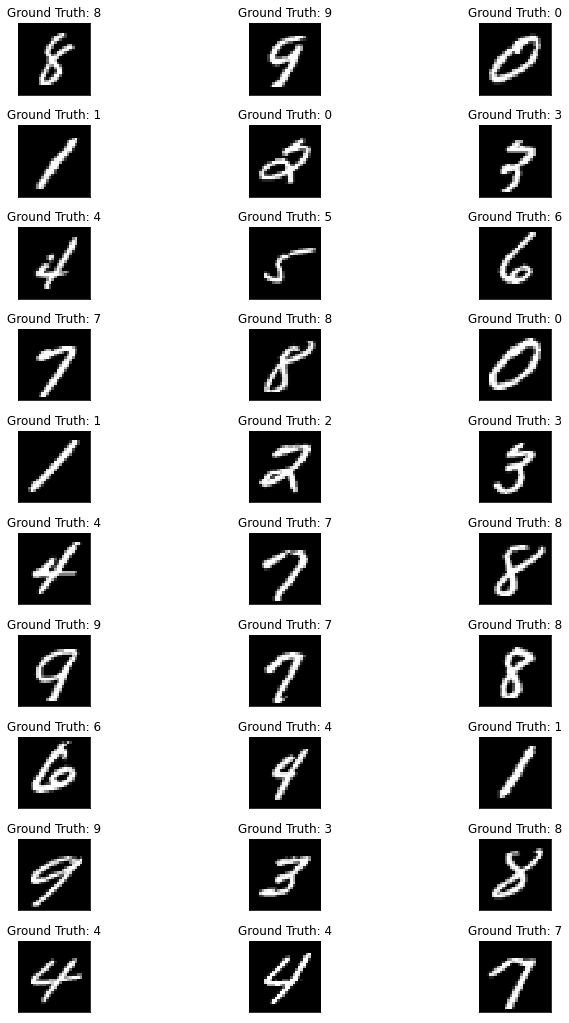

In [251]:
fig = plt.figure()
fig.set_size_inches(10.5, 14.5)
for i in range(30):
  plt.subplot(10,3,i+1)
  plt.tight_layout()
  image_unflat = inputs[:30].detach().cpu().view(30,1,28,28)
  plt.imshow(image_unflat[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(predicted[i]))
  plt.xticks([])
  plt.yticks([])


In [253]:
# Implement the model
model = full_network(784,500)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=3e-4,
                                momentum=0.5)
for epoch in range(10):
    for image, data in enumerate(train_downloader):
        # Get the inputs
        inputs, labels = data
        inputs = inputs.view(-1,28*28)

        # zero the parameter gradients
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [254]:
# using model for prediction
correct,total = 0,0
predictions = []
model.eval()
# Get the test input image and the data
for image, data in enumerate(test_downloader):
    # assign inputs and the labels
    inputs, labels = data
    # Convert the input to the preferred shape
    inputs = inputs.view(-1,28 * 28)
    # Implement the trained model on the test data
    outputs = model(inputs)
    
    # assign predicted and the value for each of the predicted
    _, predicted = torch.max(outputs.data,1)
    # Append the outputs to the predictions list
    predictions.append(outputs)
    # Get the total number of labels used
    total += labels.size(0)
    # get the total number of correctly predicted
    correct += (predicted == labels).sum().item()
print('Test accurracy of network is : %d %%' % (100 * correct/total))

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Test accurracy of network is : 86 %


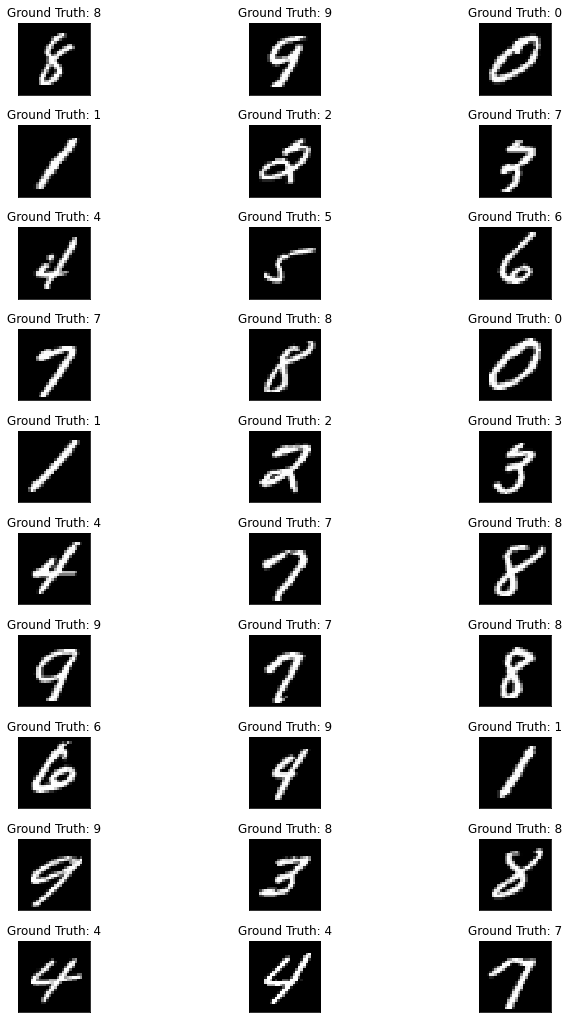

In [255]:
fig = plt.figure()
fig.set_size_inches(10.5, 14.5)
for i in range(30):
  plt.subplot(10,3,i+1)
  plt.tight_layout()
  image_unflat = inputs[:30].detach().cpu().view(30,1,28,28)
  plt.imshow(image_unflat[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(predicted[i]))
  plt.xticks([])
  plt.yticks([])
